<a href="https://colab.research.google.com/github/LordMelodias/Data-Analytics/blob/main/diwali_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diwali Sales Data
In this analysis, I explored the Diwali Sales data to uncover key insights about customer behavior, purchasing patterns, and trends. The dataset comprises 11,239 entries and 13 relevant features, including customer demographics, product details, and sales figures.

The primary objective of this analysis was to understand the distribution of sales across different segments such as gender, age group, state, occupation, and product categories. By grouping the data and visualizing it through bar charts and other statistical measures, I aimed to identify the most significant factors influencing Diwali sales.

#Import Library

In [217]:
import pandas as pd

In [218]:
import numpy as np

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
from matplotlib.ticker import FuncFormatter

# Load Data

In [221]:
df = pd.read_csv('https://raw.githubusercontent.com/LordMelodias/Data-Analytics/main/Diwali_sales.csv')

In [222]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [223]:
# Drop the unnecessary columns
columns_to_drop = ['Status', 'unnamed1']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [224]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [225]:
df.shape

(11251, 13)

In [226]:
# Drop null values
df.dropna(inplace=True)

In [227]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [228]:
#Convert Float value in Integer
df['Amount'] = df['Amount'].astype('int')

In [230]:
# Total Amount
df['Amount'].sum()

106249129

In [231]:
df.shape

(11239, 13)

#Exploratory Data Analysis

In [232]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [233]:
# Format function to add commas and a currency symbol (e.g., $)
def currency_format(x, _):
    return f'₹{x:,.0f}'

#Based on Gender

Text(0.5, 1.0, 'Gender Distribution')

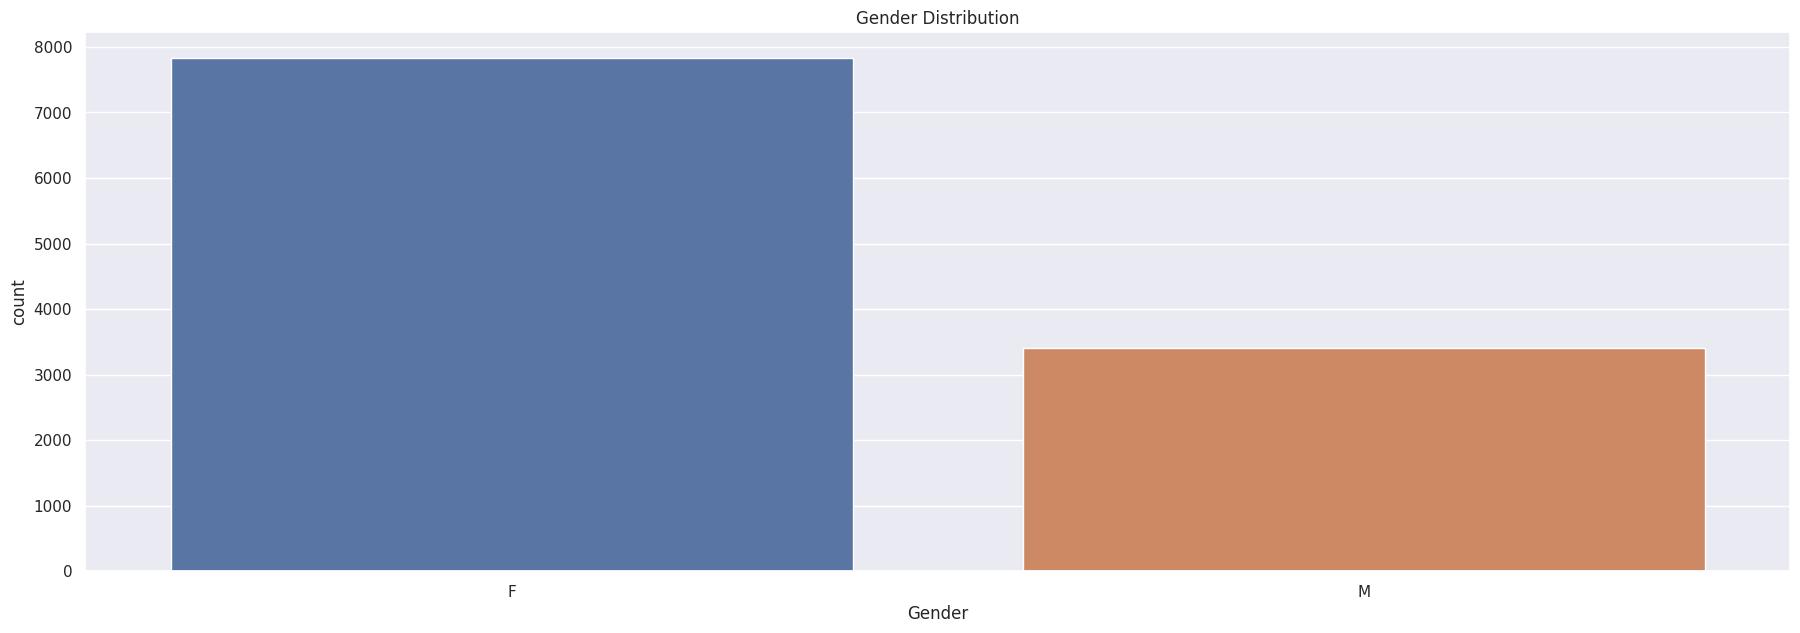

In [234]:
ax = sns.countplot(x='Gender', hue='Gender', data=df)
plt.title('Gender Distribution')

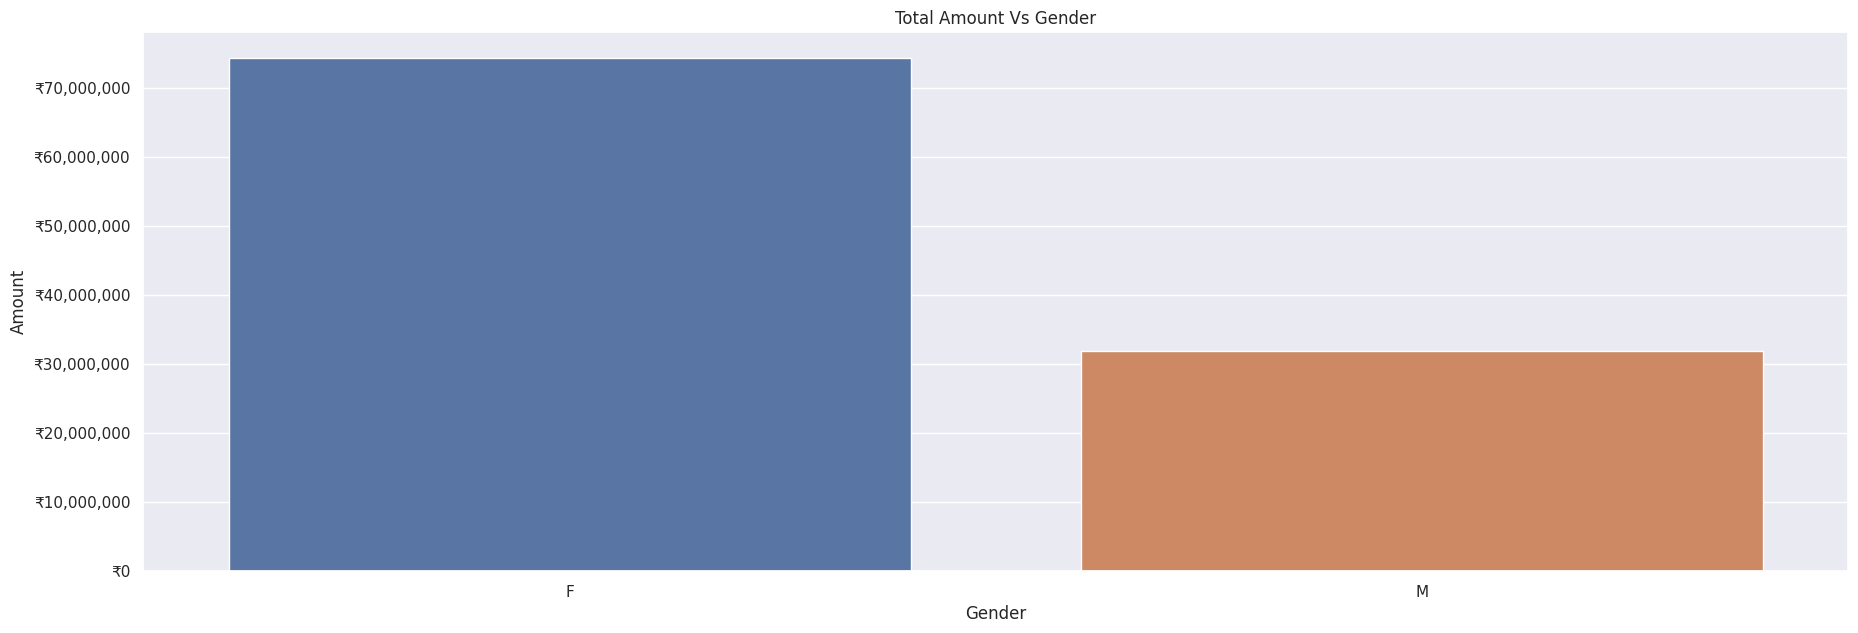

In [235]:
sale_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sale_gen, hue='Gender')
plt.title('Total Amount Vs Gender')
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

**From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than mens.**

#Based on Age

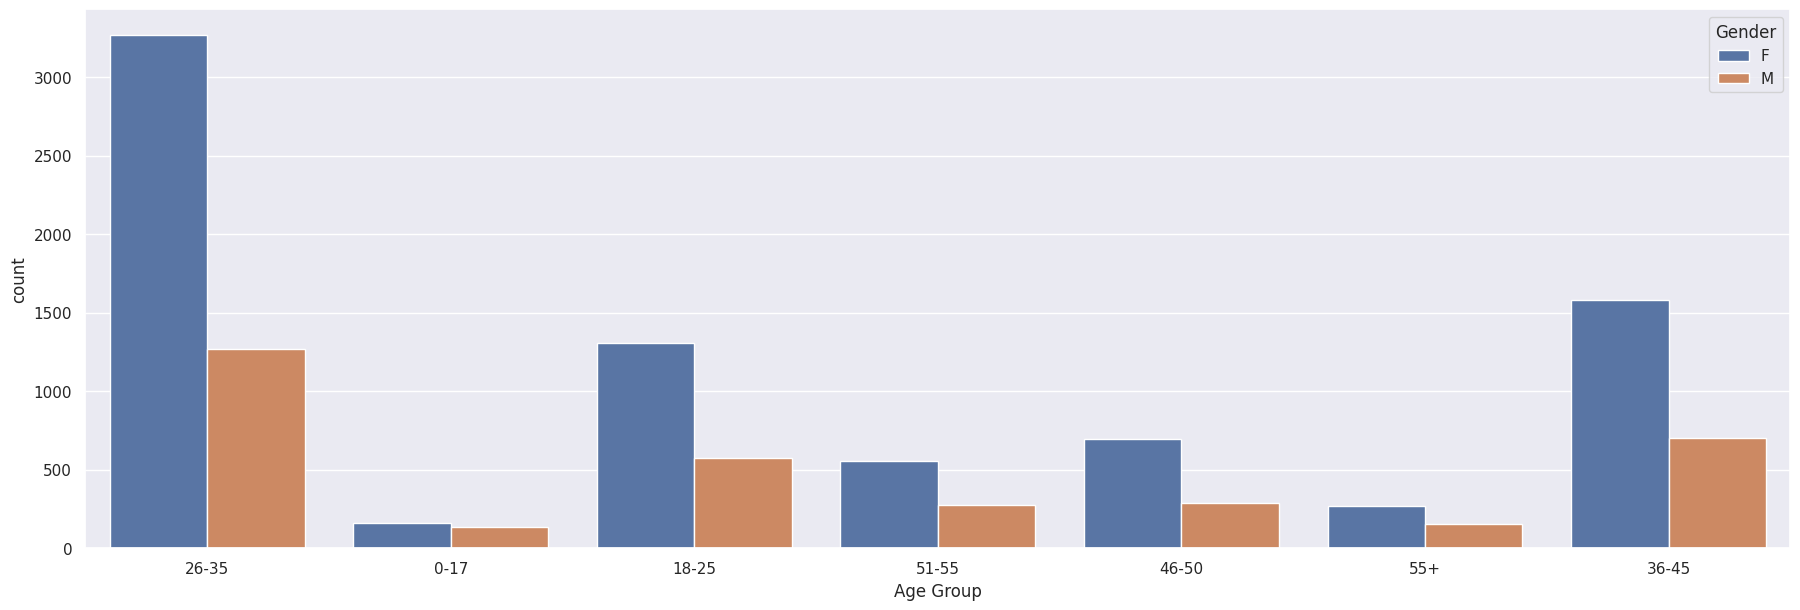

In [236]:
ax = sns.countplot(x='Age Group', hue='Gender' ,data=df)

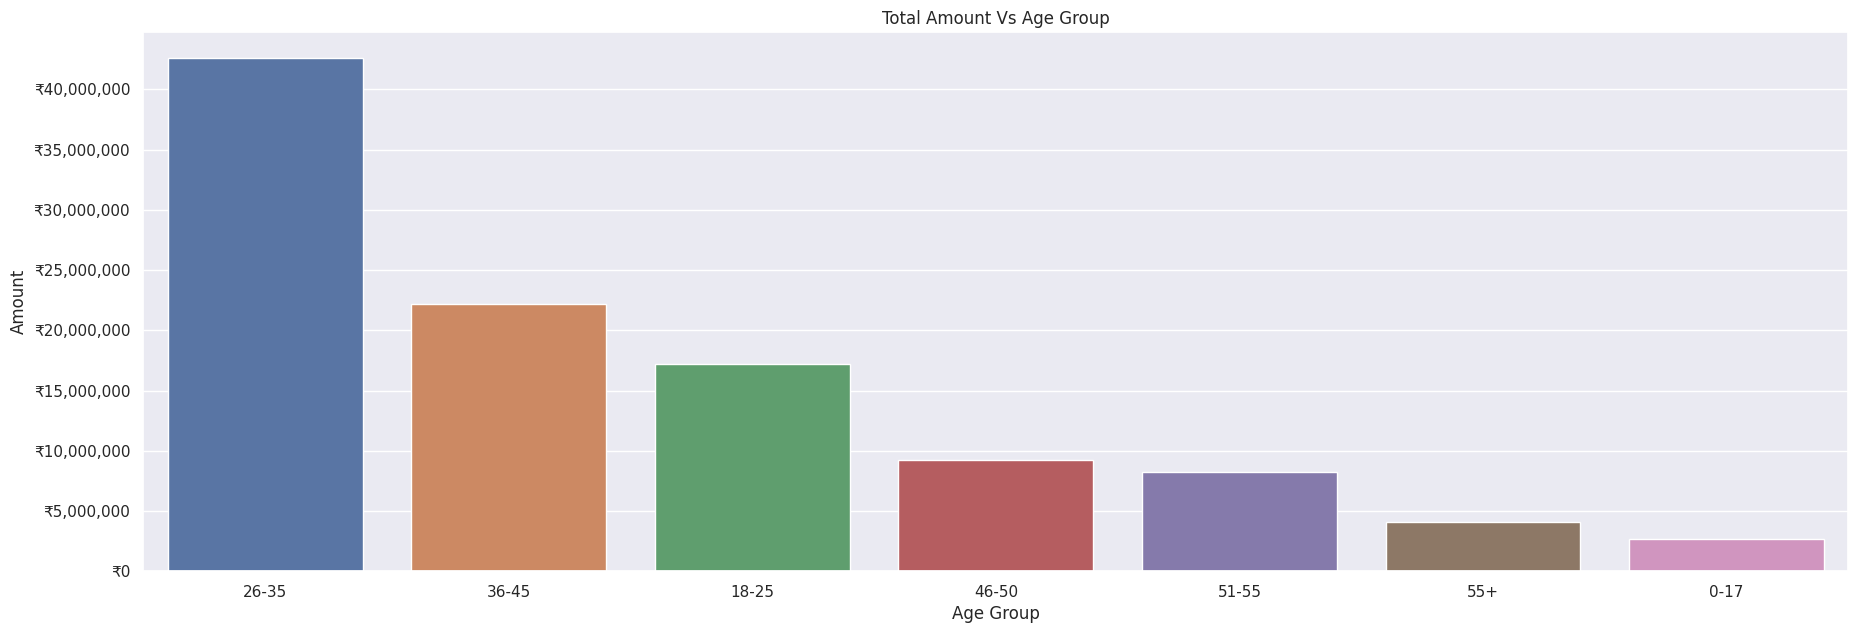

In [237]:
sale_gen = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sale_gen, x='Age Group', y='Amount', hue='Age Group')
plt.title('Total Amount Vs Age Group')
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

**From Above Graphs, We can See that most of the buyers are of age group between 26-35 yrs females.**

#Based on State

Text(0.5, 1.0, 'Total Orders Vs State')

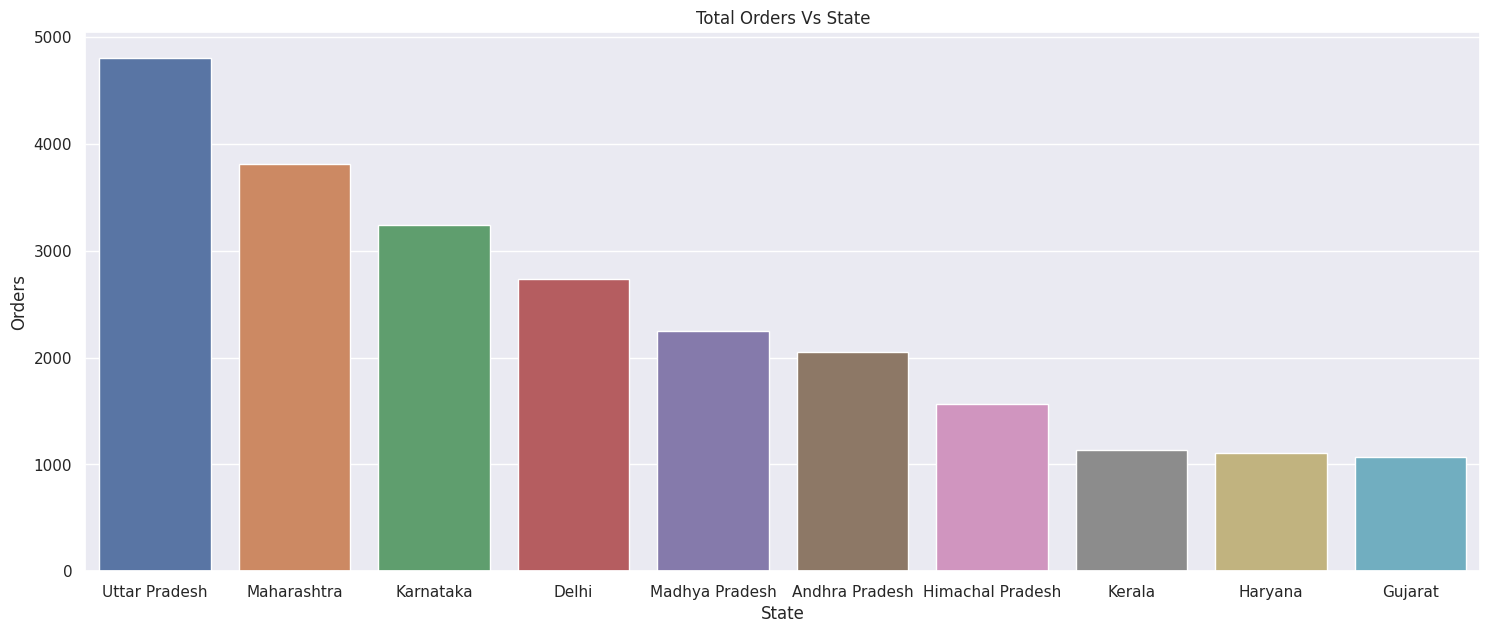

In [238]:
state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data=state, x='State', y='Orders', hue='State')
plt.title('Total Orders Vs State')

In [239]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

Text(0.5, 1.0, 'Total Amount Vs State')

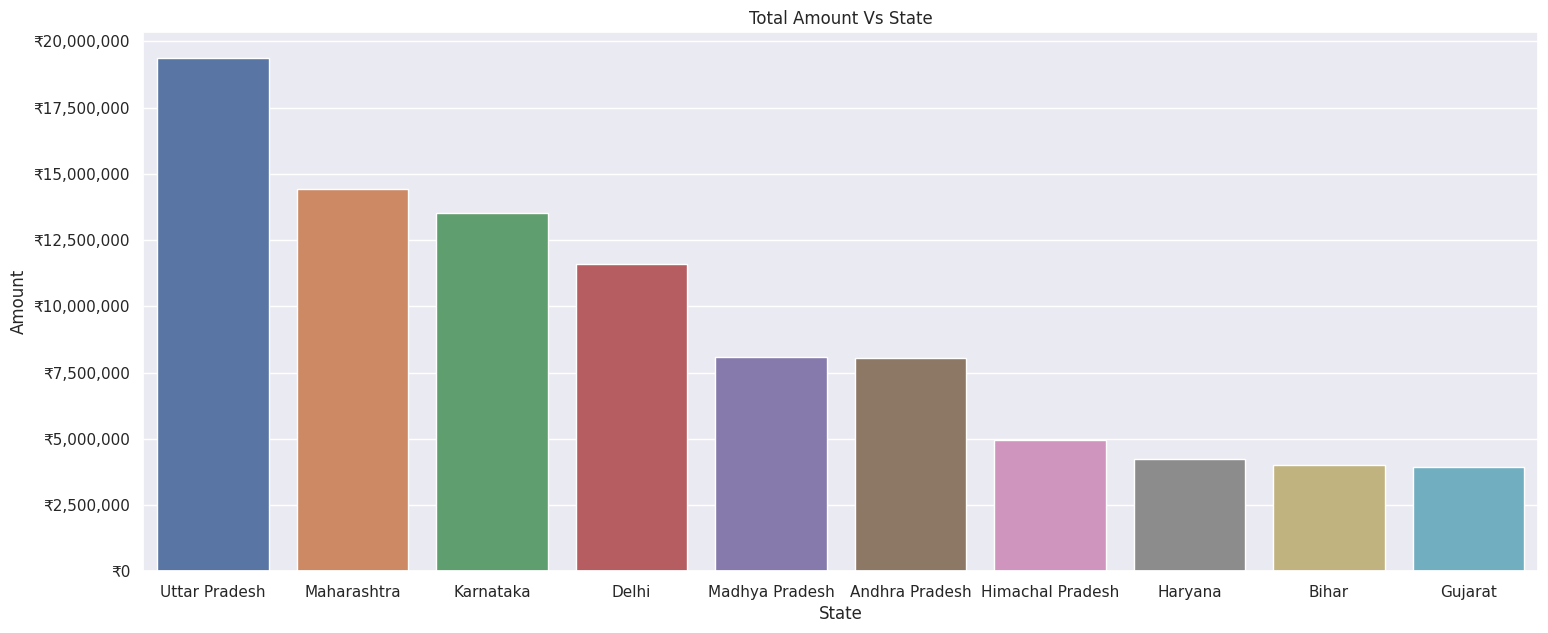

In [241]:
sns.set(rc={'figure.figsize':(18,7)})
ax = sns.barplot(data=sales_state, x='State', y='Amount', hue='State')
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Amount Vs State')

**From above graphs we can see that most of the orders & totals sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**

#Based On Marital Status

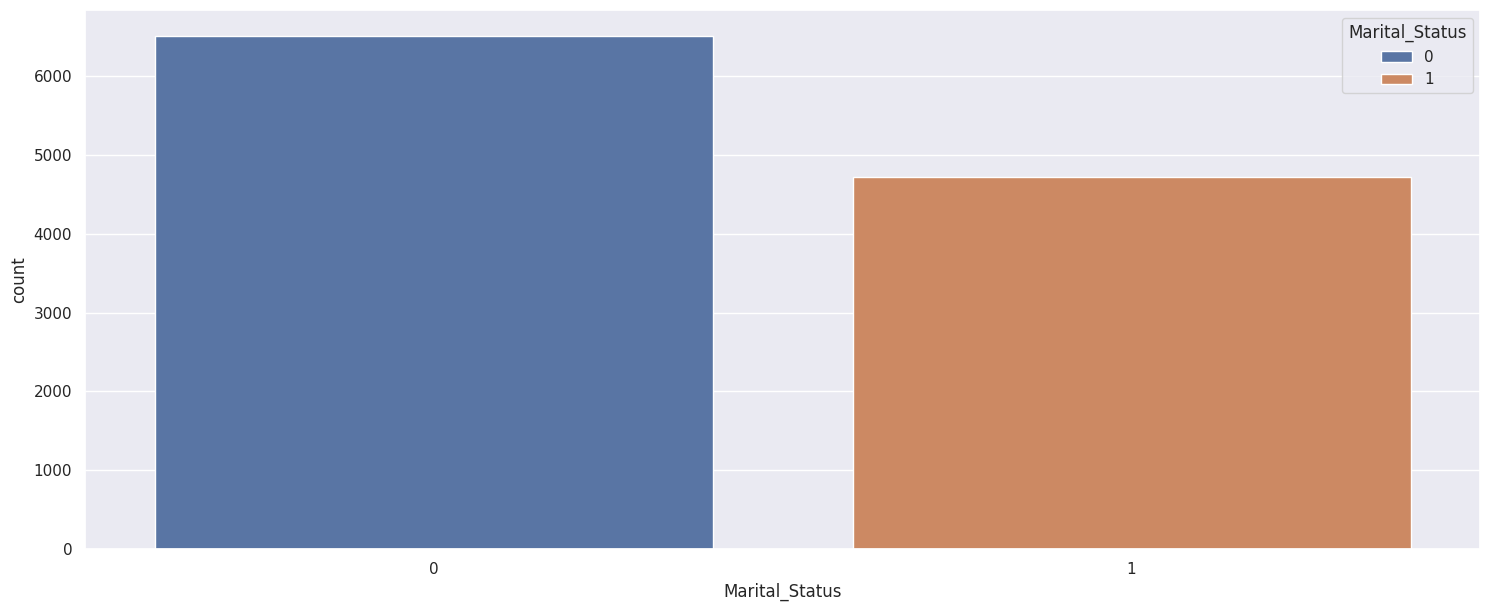

In [242]:
ax = sns.countplot(data=df, x='Marital_Status' , hue='Marital_Status')

Text(0.5, 1.0, 'Total Amount Vs Marital Status')

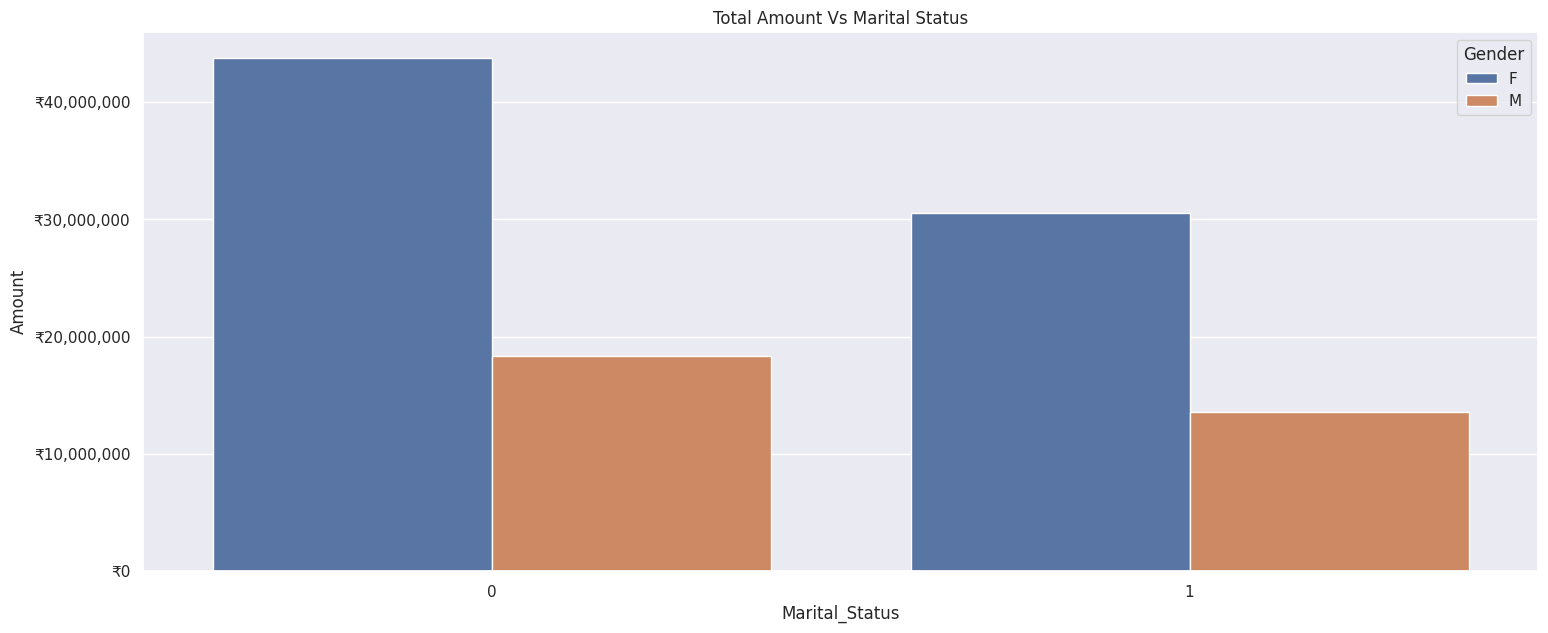

In [243]:
marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=marital, x='Marital_Status', y='Amount', hue='Gender')
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Amount Vs Marital Status')

**From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.**

#Based on Occupation

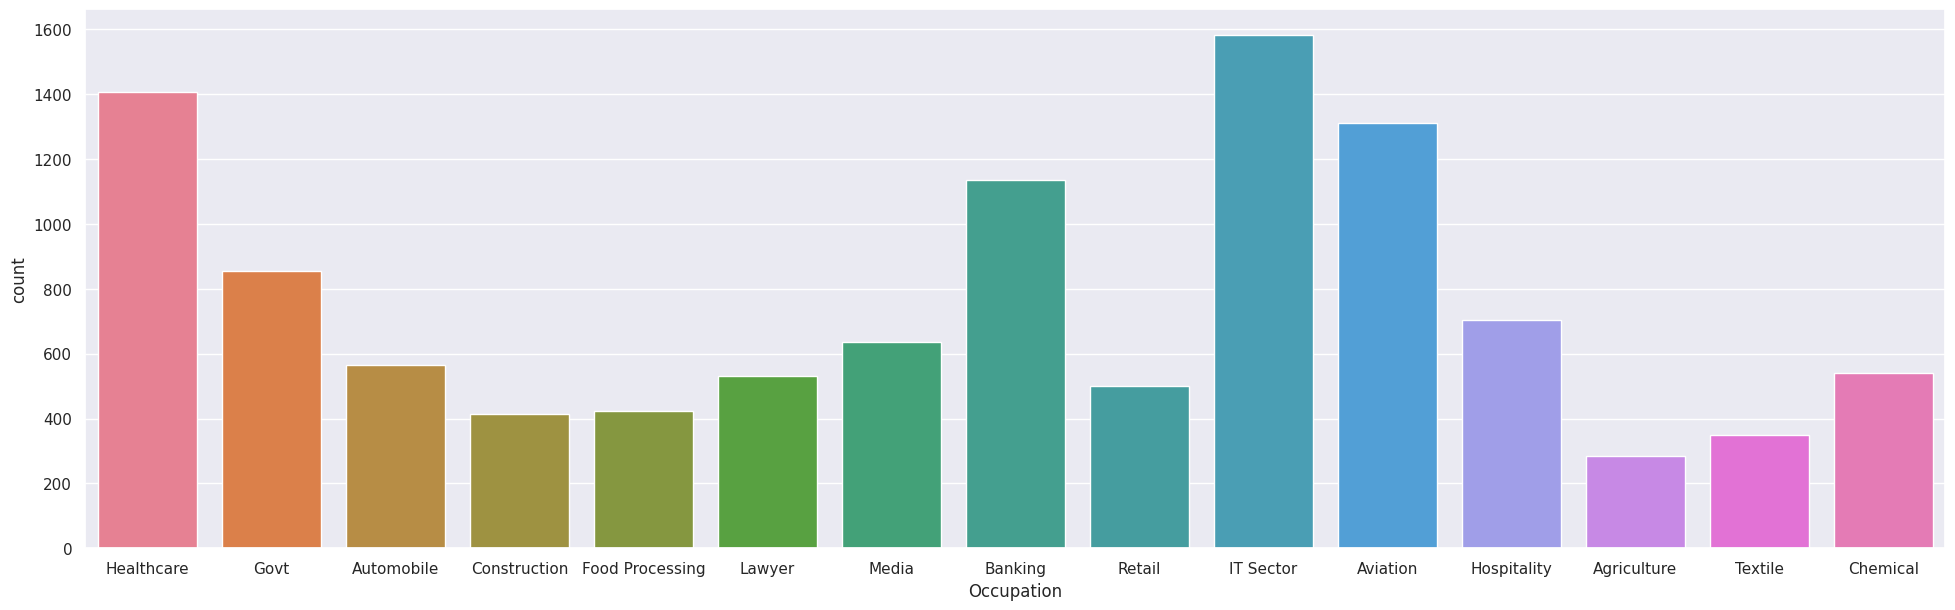

In [244]:
sns.set(rc={'figure.figsize':(24,7)})
ax = sns.countplot(data=df, x='Occupation' , hue='Occupation')

Text(0.5, 1.0, 'Total Amount Vs Occupation')

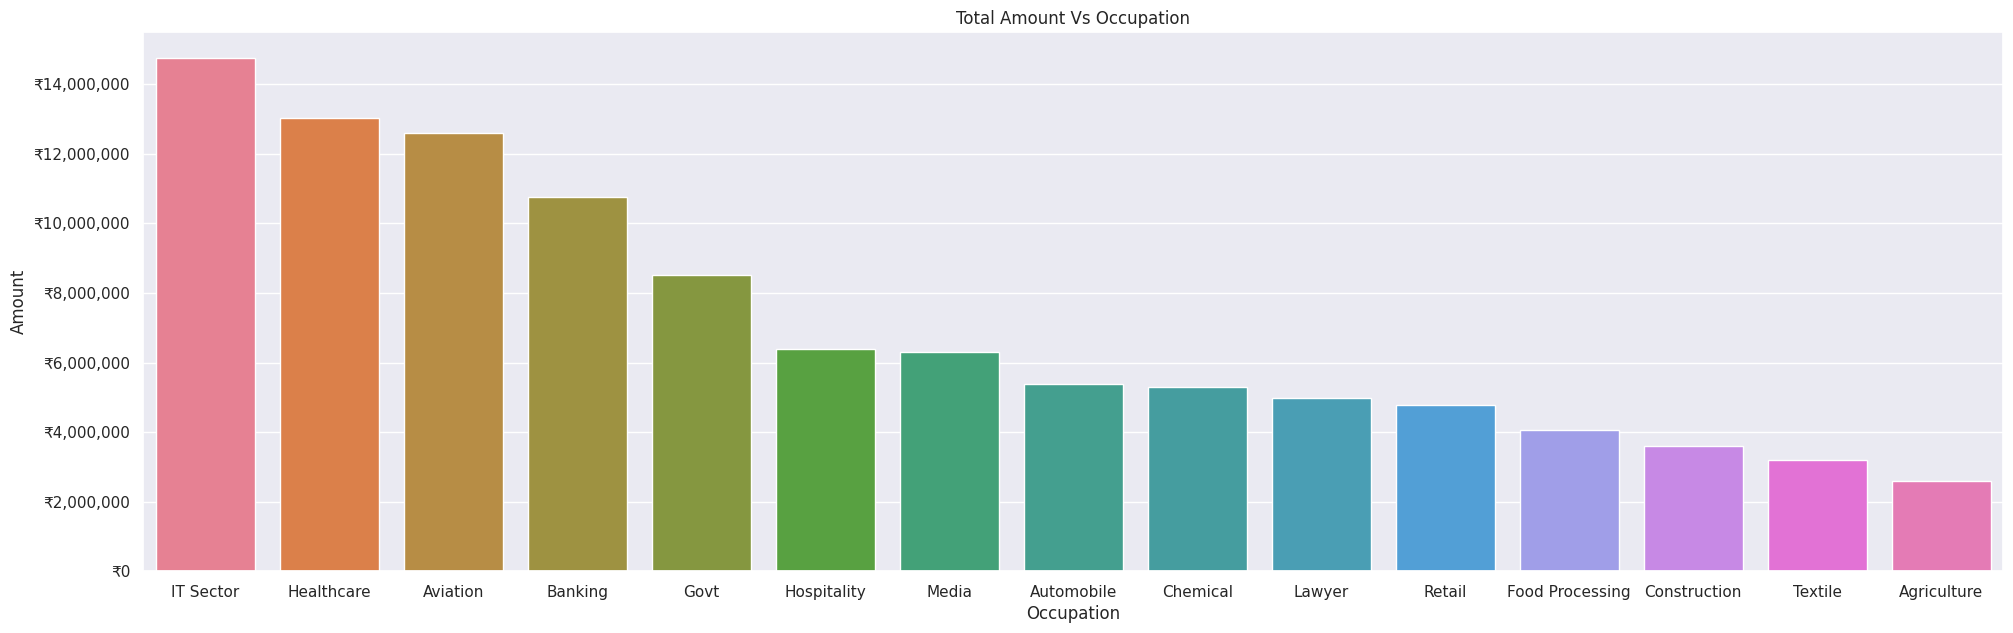

In [245]:
sale_gen = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sale_gen, x='Occupation', y='Amount', hue='Occupation')
sns.set(rc={'figure.figsize':(24,7)})
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Amount Vs Occupation')

**From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector**

#Based on Product Category

Text(0.5, 1.0, 'Product Category')

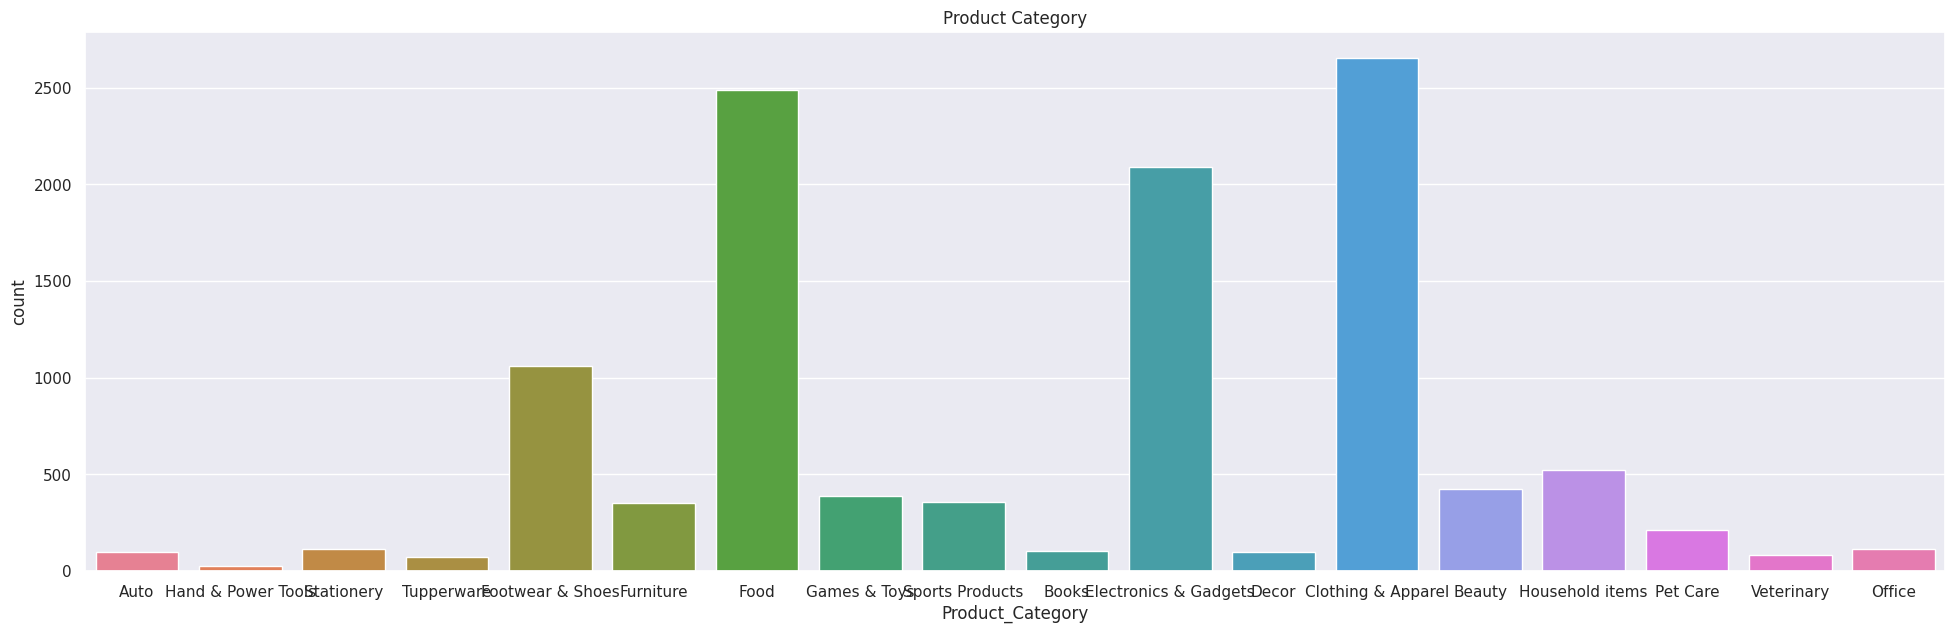

In [246]:
ax = sns.countplot(data=df, x='Product_Category' , hue='Product_Category')
sns.set(rc={'figure.figsize':(30,7)})
plt.title('Product Category')

Text(0.5, 1.0, 'Total Amount Vs Product Category')

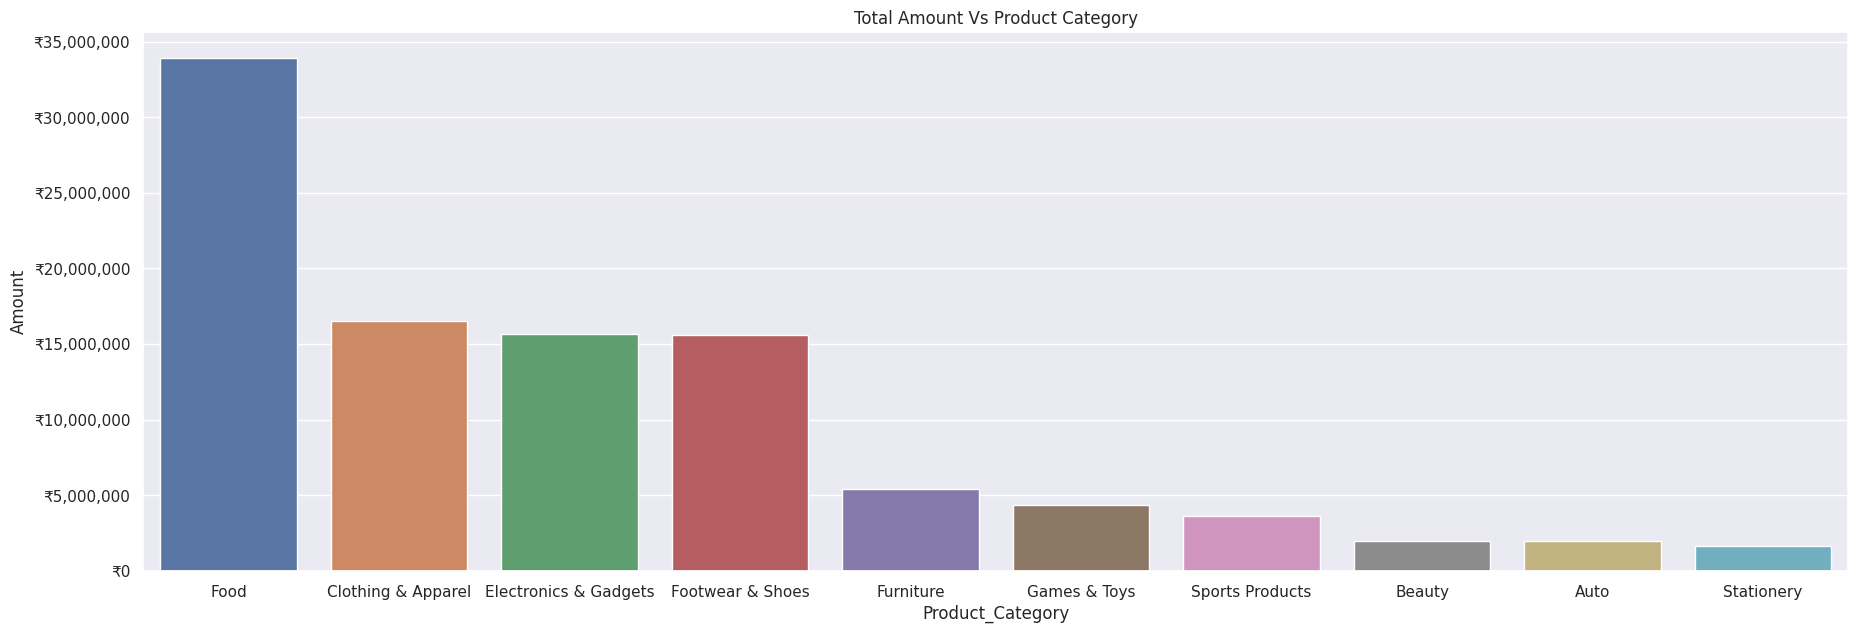

In [247]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(22,7)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Product_Category')
# Apply the format to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title('Total Amount Vs Product Category')

**From above graph we can see that most of the sold products are from Food, Clothing and Electronic category**

#Top 10 most sale products

In [248]:
df['Product_ID'].nunique()
# We have 2350 unique product_id

2350

In [249]:
top_10 = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [250]:
top_10

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


Text(0.5, 1.0, 'Top 10 Products')

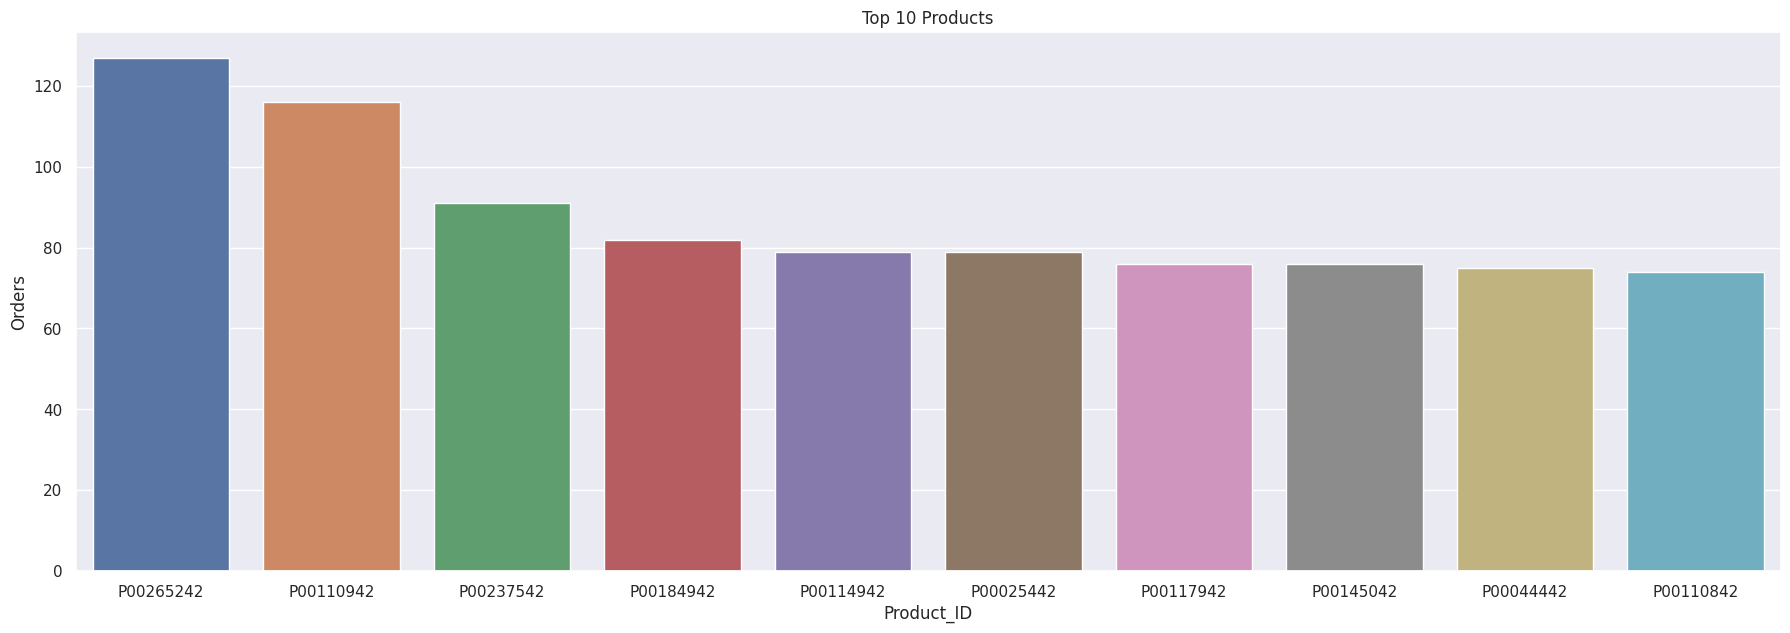

In [251]:
sns.barplot(data=top_10, x='Product_ID', y='Orders', hue='Product_ID')
plt.title('Top 10 Products')

#Conclusion

**Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.**